In [1]:
# Imports the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# imports citipy information
from citipy import citipy
from config import weather_api_key
# imports datetime
from datetime import datetime
# imports requests for API
import requests
# imports linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Generate random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Createslist for holding cities
cities = []
# Finds cities close to our randomly generated coordinates of latitudes and longitiudes
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Appends new cities to list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [5]:
# Beginning part of URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3b1524b72c9d769d7f291461dd29131e


In [6]:
# Creates empty list that will hold weather data for cities
city_data = []
# Beginning of data retrieval
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in list
for i, city in enumerate(cities):

    # Groups cities to more managable size (631 cities into groups of 50)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Creates endpoint URL with each city from our list
    city_url = url + "&q=" + city

    # Logs the URL, records it, and sets numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Adds 1 to the record count
    record_count += 1
    
    # Runs an API request for each of the cities
    try:
        # Parses the JSON and retrieves data
        city_weather = requests.get(city_url).json()
        # Retrieves the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skips the city
    except:
        print("City not found. Skipping...")
        pass

# Indicates completed data retrieval
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | formosa
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | aranjuez
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | olinda
Processing Record 10 of Set 1 | yerofey pavlovich
Processing Record 11 of Set 1 | port-cartier
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | araceli
Processing Record 18 of Set 1 | honningsvag
Processing Record 19 of Set 1 | saint-joseph
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set

Processing Record 39 of Set 4 | bafoulabe
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | bluff
Processing Record 42 of Set 4 | predivinsk
Processing Record 43 of Set 4 | iquique
Processing Record 44 of Set 4 | jiddah
City not found. Skipping...
Processing Record 45 of Set 4 | manado
Processing Record 46 of Set 4 | pincher creek
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | hilo
Processing Record 1 of Set 5 | marzuq
Processing Record 2 of Set 5 | kismayo
Processing Record 3 of Set 5 | zuwarah
Processing Record 4 of Set 5 | santa luzia
Processing Record 5 of Set 5 | kinanah
City not found. Skipping...
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | nelson bay
Processing Record 8 of Set 5 | nouakchott
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...

Processing Record 24 of Set 8 | harper
Processing Record 25 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 26 of Set 8 | fairbanks
Processing Record 27 of Set 8 | whitehorse
Processing Record 28 of Set 8 | pointe-noire
Processing Record 29 of Set 8 | burns lake
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | kathu
Processing Record 32 of Set 8 | kahului
Processing Record 33 of Set 8 | saint-maximin-la-sainte-baume
Processing Record 34 of Set 8 | zyryanka
Processing Record 35 of Set 8 | leningradskiy
Processing Record 36 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 8 | luorong
Processing Record 38 of Set 8 | pimenta bueno
Processing Record 39 of Set 8 | noumea
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | barbar
City not found. Skipping...
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | pevek
Processing Record 44 of Set 8 | taltal
Processing Record 45 

Processing Record 4 of Set 12 | bonthe
Processing Record 5 of Set 12 | port augusta
Processing Record 6 of Set 12 | paracin
Processing Record 7 of Set 12 | along
Processing Record 8 of Set 12 | sao joao da barra
Processing Record 9 of Set 12 | vichayal
City not found. Skipping...
Processing Record 10 of Set 12 | san andres
Processing Record 11 of Set 12 | berettyoujfalu
Processing Record 12 of Set 12 | sikonge
Processing Record 13 of Set 12 | pacific grove
Processing Record 14 of Set 12 | ako
Processing Record 15 of Set 12 | amethi
Processing Record 16 of Set 12 | riyadh
Processing Record 17 of Set 12 | tefe
Processing Record 18 of Set 12 | urubicha
Processing Record 19 of Set 12 | morondava
Processing Record 20 of Set 12 | beroroha
Processing Record 21 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 22 of Set 12 | seoni malwa
Processing Record 23 of Set 12 | nayudupeta
Processing Record 24 of Set 12 | luderitz
Processing Record 25 of Set 12 | sao joaquim
Processing R

In [7]:
# Convert the array to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,6.40,96,86,1.23,CA,2020-04-17 11:47:47
1,Klaksvik,62.23,-6.59,46.40,68,90,5.82,FO,2020-04-17 11:51:32
2,Formosa,-26.18,-58.18,51.80,93,0,4.94,AR,2020-04-17 11:48:02
3,Ahipara,-35.17,173.17,65.50,86,74,20.13,NZ,2020-04-17 11:48:26
4,Kununurra,-15.77,128.73,86.00,62,21,8.05,AU,2020-04-17 11:48:54
5,Karratha,-20.74,116.85,85.30,62,98,10.96,AU,2020-04-17 11:51:33
6,Aranjuez,40.03,-3.60,64.99,67,75,12.75,ES,2020-04-17 11:51:33
7,Nikolskoye,59.70,30.79,45.00,48,75,22.37,RU,2020-04-17 11:47:54
8,Olinda,-8.01,-34.86,86.00,70,40,9.17,BR,2020-04-17 11:51:34
9,Yerofey Pavlovich,53.97,121.97,32.68,69,24,8.28,RU,2020-04-17 11:51:34


In [8]:
# Changes column order for parsing
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2020-04-17 11:47:47,69.45,-133.04,6.4,96,86,1.23
1,Klaksvik,FO,2020-04-17 11:51:32,62.23,-6.59,46.4,68,90,5.82
2,Formosa,AR,2020-04-17 11:48:02,-26.18,-58.18,51.8,93,0,4.94
3,Ahipara,NZ,2020-04-17 11:48:26,-35.17,173.17,65.5,86,74,20.13
4,Kununurra,AU,2020-04-17 11:48:54,-15.77,128.73,86.0,62,21,8.05


In [10]:
# Creates the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export city_data to to a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extracts relevant data that will be used for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Imports the time module
import time
# Gets today's date in second
today = time.time()
today

1587124445.6501937

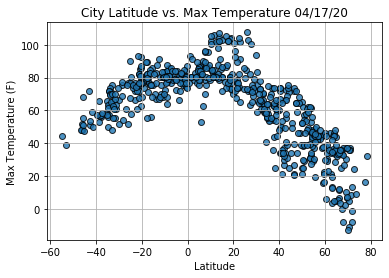

In [13]:
# Builds a scatter plot for the latitude vs the max temperature
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = 0.8, label = "Cities")

# Adds title, labels, and grid
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saves figure
plt.savefig("weather_data/Fig1.png")

# Shows plot
plt.show()

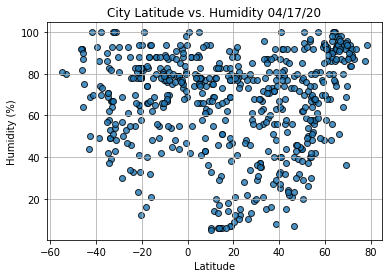

In [14]:
# Builds the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker = "o",
            alpha = 0.8, label = "Cities")

# Adds title, labels, and grid
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig2.png")
# Shows the graph
plt.show()

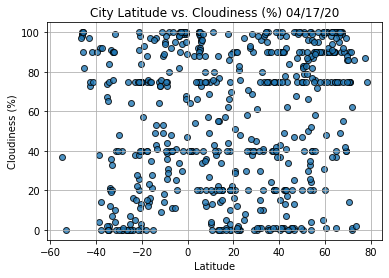

In [15]:
# Builds a scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black",
            linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig3.png")
# Shows the plot
plt.show()

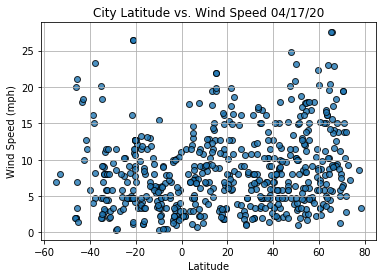

In [16]:
# Builds a scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1,
            marker = "o", alpha = 0.8, label = "Cities")

# Incorporates the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Saves the figure
plt.savefig("weather_data/Fig4.png")
# Shows the plot
plt.show()

In [17]:
# Creates a function to create perform linear regression on the weather data
# Then plots the regression line 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Creates and saves Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

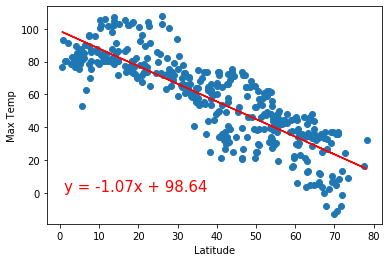

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

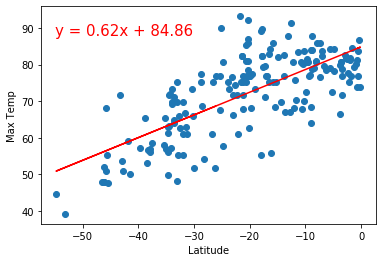

In [20]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Calls the function with the values
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispher for Maximum Temperature',
                       'Max Temp',(-55,88))

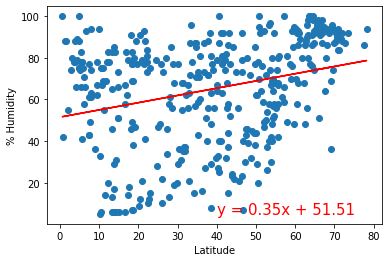

In [21]:
# Linear regression on the Northern Hemisphere for the humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Calls fn
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,5))

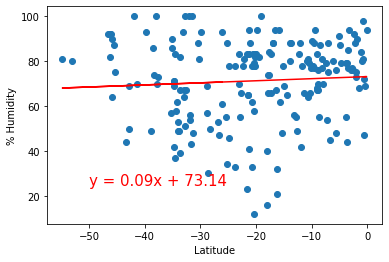

In [22]:
# Linear regression on the Southern Hemisphere for the humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,25))